# dogs_vs_cats Dataset

- Modelo pré-treinados: https://keras.io/applications/

### Importa as funções que vamos utilizar

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score

from tensorflow.keras.models import model_from_json
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

### Criar o modelo
Documentação:
    - Conv2D: https://keras.io/layers/convolutional/
    - MaxPooling2D: https://keras.io/layers/pooling/
    - Dense e Flatten: https://keras.io/layers/core/
    - compile: https://keras.io/models/sequential/
    - Optimizer: https://keras.io/optimizers/

In [2]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))

# mark loaded layers as not trainable
for layer in base_model.layers:
    layer.trainable = False

model_top = Sequential()
model_top.add(Flatten()),  
model_top.add(Dense(128, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(128, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(1, activation='sigmoid')) 

classificador = Model(inputs=base_model.input, outputs=model_top(base_model.output))
      
opt = SGD(lr=0.001, momentum=0.9)

classificador.compile(
    loss='binary_crossentropy', # binary_crossentropy porque estamos trabalhando com um problema de 2 classes
    optimizer='adam', # sgd ou adam
    metrics=['accuracy']
)

classificador.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Criar o gerador de imagens
O Gerador é responsável por ler as imagens e fornecer para nossa rede neural, podendo ou não realziar data augmentation

https://keras.io/preprocessing/image/

In [3]:
gerador_treinamento = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 7,
    horizontal_flip = True,
    shear_range = 0.2,
    height_shift_range = 0.07,
    zoom_range = 0.2)

gerador_teste = ImageDataGenerator(rescale = 1./255)

In [4]:
base_treinamento = gerador_treinamento.flow_from_directory(
    directory='datasets/dogs_vs_cats/train',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'binary')

base_teste = gerador_teste.flow_from_directory(
    directory='datasets/dogs_vs_cats/test',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'binary',
    shuffle=False)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Treina a rede neural
https://keras.io/models/sequential/

In [5]:
history = classificador.fit(
    x = base_treinamento,
    validation_data = base_teste,
    epochs = 10
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 32 steps, validate for 8 steps
Epoch 1/10
32/32 [==============================] - 46s 1s/step - loss: 0.7355 - accuracy: 0.6710 - val_loss: 0.3129 - val_accuracy: 0.8670
Epoch 2/10
32/32 [==============================] - 40s 1s/step - loss: 0.3065 - accuracy: 0.8752 - val_loss: 0.2225 - val_accuracy: 0.9060
Epoch 3/10
32/32 [==============================] - 40s 1s/step - loss: 0.2459 - accuracy: 0.9038 - val_loss: 0.2216 - val_accuracy: 0.9040
Epoch 4/10
32/32 [==============================] - 40s 1s/step - loss: 0.2222 - accuracy: 0.9045 - val_loss: 0.1922 - val_accuracy: 0.9190
Epoch 5/10
32/32 [==============================] - 40s 1s/step - loss: 0.1977 - accuracy: 0.9175 - val_loss: 0.1905 - val_accuracy: 0.9180
Epoch 6/10
32/32 [==============================] - 40s 1s/step - loss: 0.1807 - accuracy: 0.9280 - val_loss: 0.1905 - val_accuracy: 0.9260
Epoch 7/10
32/32 [==============================] - 41s 1s/step - los

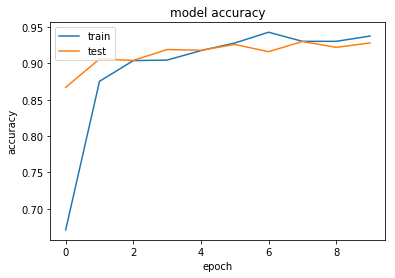

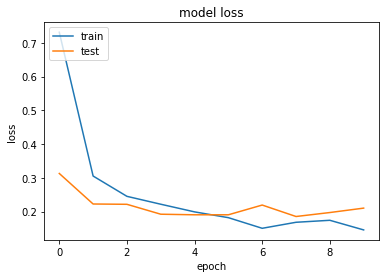

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Avaliar o modelo

In [7]:
# Reinicia o gerador de imagem de teste 
base_teste.reset()

# Faz a previsão dsa imagens de teste usando o modelo
previsao = classificador.predict(base_teste)
print(f"Probabilidade da primeira imagem pertencer a cada classe: {previsao[0]}")

# Retorna a classe com maior probabilidade
previsao = np.around(previsao)
print(f"Classe da primeira imagem: {previsao[0]}\n\n")

Probabilidade da primeira imagem pertencer a cada classe: [0.41904673]
Classe da primeira imagem: [0.]




In [8]:
print('Confusion Matrix')
print(confusion_matrix(base_teste.classes, previsao))

print(f'\nAccuracy {accuracy_score(base_teste.classes, previsao)}')

print(f'\nBalanced Accuracy {balanced_accuracy_score(base_teste.classes, previsao)}')

print('\nClassification Report')
print(classification_report(base_teste.classes, previsao, target_names=base_treinamento.class_indices.keys()))

Confusion Matrix
[[458  42]
 [ 30 470]]

Accuracy 0.928

Balanced Accuracy 0.9279999999999999

Classification Report
              precision    recall  f1-score   support

         cat       0.94      0.92      0.93       500
         dog       0.92      0.94      0.93       500

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



### Salvar a rede neural

In [9]:
classificador_json = classificador.to_json()
with open('classificador_vgg16_dog_cat.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador_vgg16_dog_cat.h5')

### Ler a rede neural salva

In [10]:
arquivo = open('classificador_vgg16_dog_cat.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()

classificador = model_from_json(estrutura_rede)
classificador.load_weights('classificador_vgg16_dog_cat.h5')

In [11]:
classificador.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Testar com uma imagem nova

In [12]:
## Ler a imagem

imagem_teste = image.load_img(
    path='datasets/dogs_vs_cats/test/dog/dog.3500.jpg',
    target_size = (224,224)
)

#imagem_teste.show()

## Converter para matriz de números
imagem_teste = image.img_to_array(imagem_teste)

## Deixar os valores dos pixels [0,1], igual feito no rescale do ImageDataGenerator
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

previsao = classificador.predict(imagem_teste)
print(previsao)
print(np.argmax(previsao))

base_treinamento.class_indices

[[0.9992805]]
0


{'cat': 0, 'dog': 1}